# Assignment 1a

## Task 1

### a 

The total size of the entire folder is 2.6T. To get the size figure, we can list files with option -s, which prints the size. Also, option -h can convert the figure to be human-readable. 

In [1]:
ls -lstrh /mnt/data/MetService_WRF/

total 2.6T
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20000101000000.nc
319M -r--r--r-- 1 root root 319M Feb  3  2022 RAINNC_20000201000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20000301000000.nc
330M -r--r--r-- 1 root root 330M Feb  3  2022 RAINNC_20000401000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20000501000000.nc
330M -r--r--r-- 1 root root 330M Feb  3  2022 RAINNC_20000601000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20000701000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20000801000000.nc
330M -r--r--r-- 1 root root 330M Feb  3  2022 RAINNC_20000901000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20001001000000.nc
330M -r--r--r-- 1 root root 330M Feb  3  2022 RAINNC_20001101000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20001201000000.nc
341M -r--r--r-- 1 root root 341M Feb  3  2022 RAINNC_20010101000000.nc
308M -r--r--r-- 1 root root 308M Feb  3  2022 RAINNC_2001020100000

### b

by using opetion | wc. :

The number of counts depends if we include redundant_data folder or not. If it is included, the count is 1,262. If it is not and we only take files with .nc, the count number is 1,261.

In [2]:
ls -h  /mnt/data/MetService_WRF/  | wc -l

1262


In [3]:
ls -h  /mnt/data/MetService_WRF/*.nc  | wc -l

1261


## Task 2

### a

By loading file U_20150301000000.nc, the dataset in this file was recorded at various height level, which has 10 different heights. 

In [4]:
import xarray as xr
ds = xr.open_dataset("/mnt/data/MetService_WRF/U_20150301000000.nc")
ds["U"] #to call the dataarray.

<xarray.DataArray 'U' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-03-01 ... 2015-03-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

### b

In [5]:
#load dataset of Relative Humidity, chose the file for the Month of Jan & Year 2019
ds_rh = xr.open_dataset("/mnt/data/MetService_WRF/RH_20190101000000.nc")

In [6]:
#select the data near Christchurch (-43.525650, 172.639847)
Near_CHCH_rh = ds_rh.RH.sel(lat=-43.525650, lon = 172.639847, method="nearest")

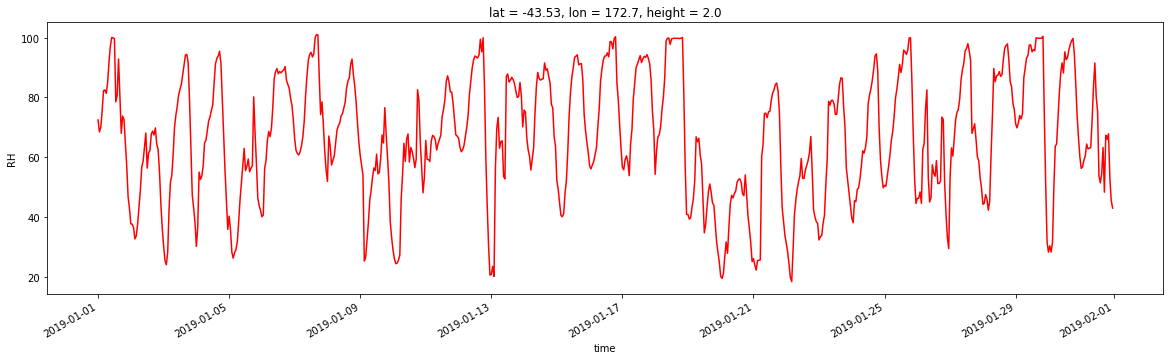

In [7]:
#Plot Relative Humidity data for 201901, Christchurch
Near_CHCH_rh.plot(linestyle="solid", color="red", figsize=(20,5))

### c

In [8]:
#load dataset of Air Temperature, chose the file for the Month of Jan & Year 2019
ds_at = xr.open_dataset("/mnt/data/MetService_WRF/T_20190101000000.nc")

In [9]:
#select the data where it has height of 20 metres above the ground
h20_at = ds_at.sel(height=20)

#select the data near Christchurch (-43.525650, 172.639847)
Near_CHCH_at = h20_at.T.sel(lat=-43.525650, lon = 172.639847, method="nearest") - 273

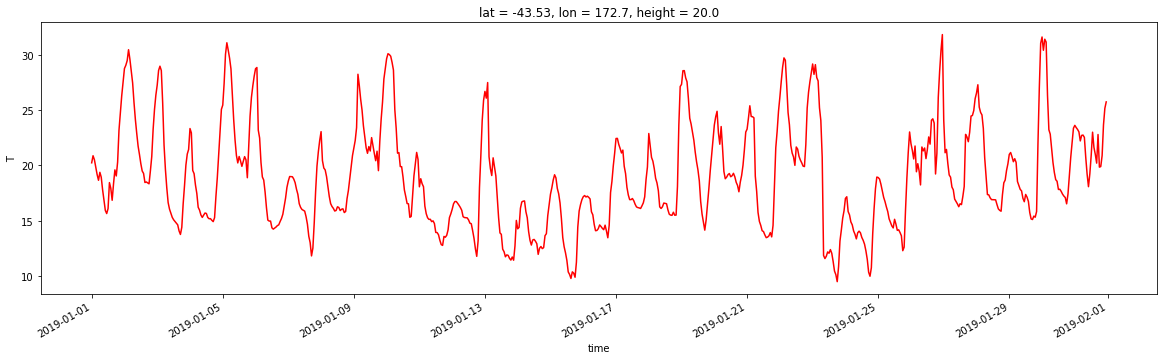

In [10]:
#Plot Air Temperature data for 201901, Christchurch
Near_CHCH_at.plot(linestyle="solid", color="red", figsize=(20,5))

### d

#### Redo b:

In [11]:
# select data over 2 days from 20190103 to 20190105
Near_CHCH_rh_2days = Near_CHCH_rh.sel(time = slice("2019-01-03T0000:00.000000000","2019-01-05T00:00:00.000000000"))

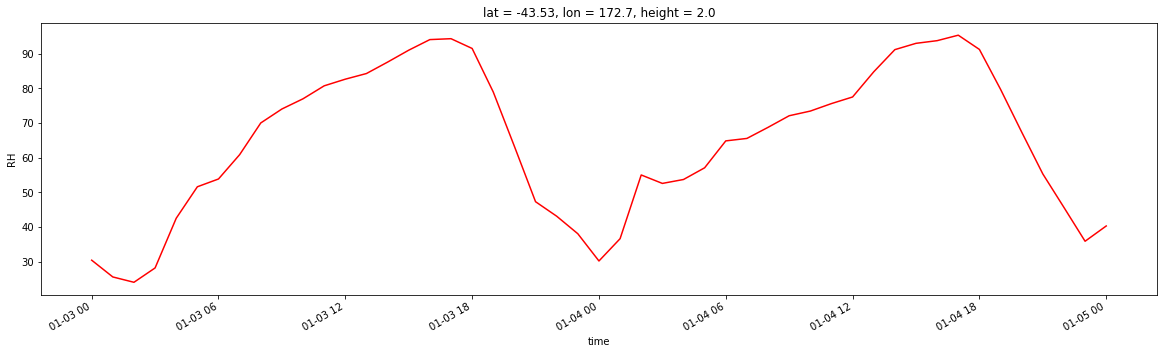

In [12]:
#plot the Relative Humandity for selected 2 days
Near_CHCH_rh_2days.plot(linestyle="solid", color="red", figsize=(20,5))

#### Redo c:

In [13]:
# select data over 2 days from 20190103 to 20190105
Near_CHCH_at_2days = Near_CHCH_at.sel(time = slice("2019-01-03T0000:00.000000000","2019-01-05T00:00:00.000000000")) 

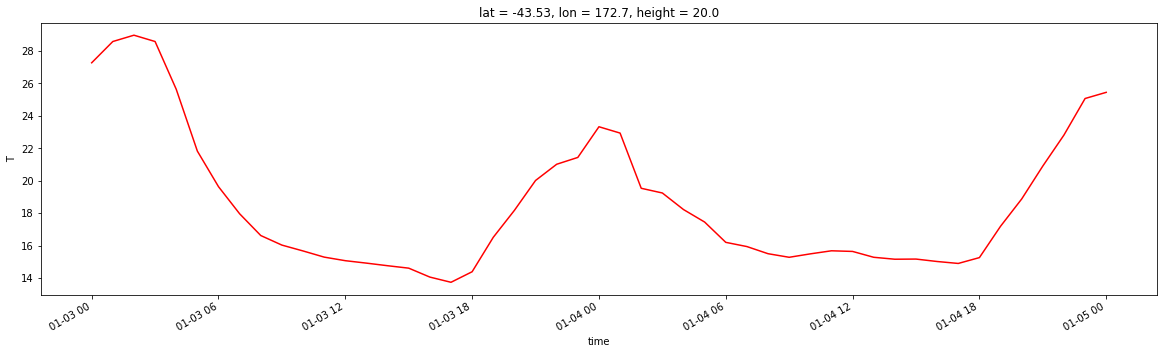

In [14]:
#plot the Air Temperature for selected 2 days
Near_CHCH_at_2days.plot(linestyle="solid", color="red", figsize=(20,5))